Regression

Regression Assignment Objective:
The objective of this assignment is to evaluate your understanding of regression techniques in
supervised learning by applying them to a real-world dataset.
Dataset:
Use the California Housing dataset available in the sklearn library. This dataset contains
information about various features of houses in California and their respective median prices.
Key Components to be Fulfilled:
1. Loading and Preprocessing (2 marks):
● Load the California Housing dataset using the fetch_california_housing function
from sklearn.
● Convert the dataset into a pandas DataFrame for easier handling. Handle
missing values (if any) and perform necessary feature scaling (e.g.,
standardization).
● Explain the preprocessing steps you performed and justify why they are
necessary for this dataset.

2. Regression Algorithm Implementation (5 marks):
● Implement the following regression algorithms:
○ Linear Regression
○ Decision Tree Regressor
○ Random Forest Regressor
○ Gradient Boosting Regressor
○ Support Vector Regressor (SVR)
● For each algorithm: Provide a brief explanation of how it works. Explain why it
might be suitable for this dataset.
3. Model Evaluation and Comparison (2 marks):
● Evaluate the performance of each algorithm using the following metrics:
○ Mean Squared Error (MSE)
○ Mean Absolute Error (MAE)
○ R-squared Score (R2)
● Compare the results of all models and identify: The best-performing algorithm
with justification and the worst-performing algorithm with reasoning.

4. Timely Submission (1 mark):
● Submit your code in a Jupyter Notebook format via a GitHub link.
● Ensure that your code is well-documented and explanations are clear and
concise.
● Submission Guidelines: Use Python and Jupyter Notebook for implementation.
Submit the GitHub repository link containing the code and all necessary files.
Ensure proper documentation, including code comments and markdown
explanations.

Total Score: 10

1. Loading and Preprocessing (2 marks):
- Load the California Housing dataset using the fetch_california_housing function
from sklearn.
- Convert the dataset into a pandas DataFrame for easier handling. Handle
missing values (if any) and perform necessary feature scaling (e.g.,
standardization).
- Explain the preprocessing steps you performed and justify why they are
necessary for this dataset.

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [604]:
from sklearn.datasets import fetch_california_housing
cal_house=fetch_california_housing(as_frame=True)



In [605]:
cal_house=cal_house.frame

In [606]:
cal_house.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [607]:
cal_house.info()#there is no null fields 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [608]:
cal_house.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [609]:
#check any nan in any of the columns
cal_house.columns.isna()
#There is no nan values in any of the column.So the data is clean


array([False, False, False, False, False, False, False, False, False])

Checking for outliers

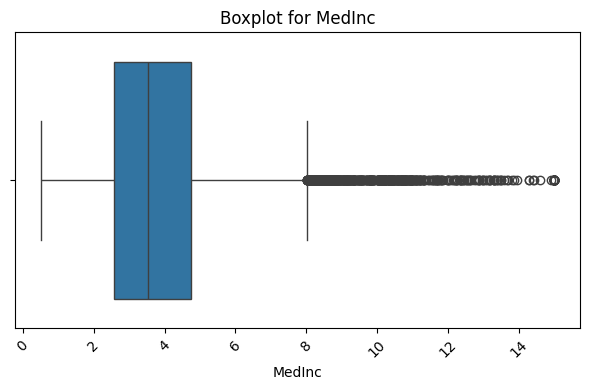

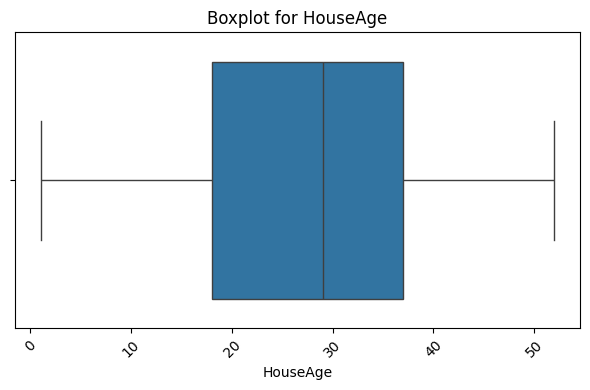

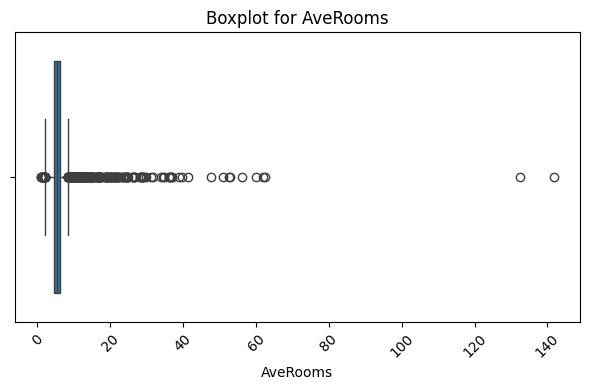

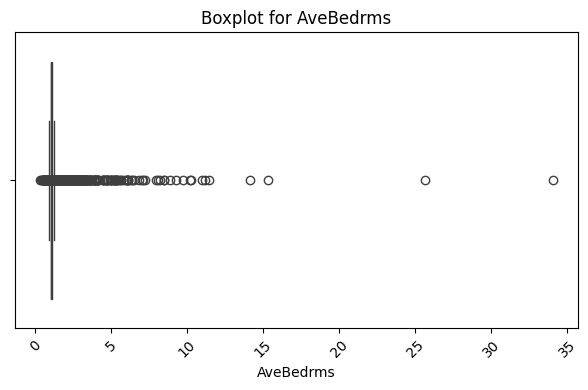

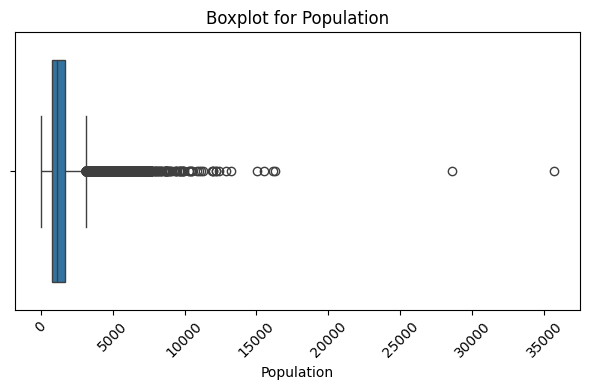

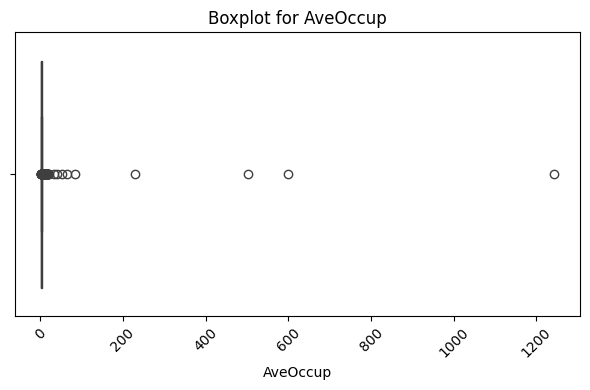

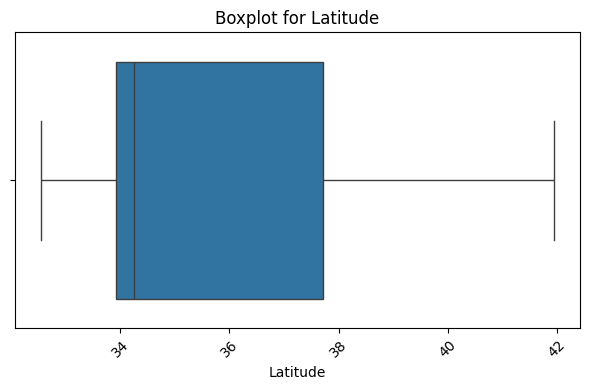

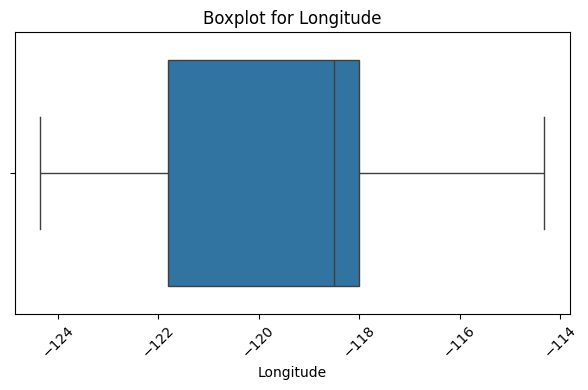

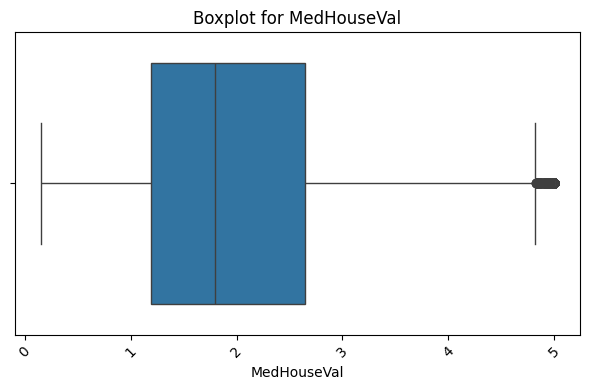

In [610]:
for col in cal_house.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=cal_house[col])
    plt.title(f'Boxplot for {col}')
    plt.xticks(rotation=45)  
    plt.tight_layout()
    plt.show()

In [611]:
#Outliers need to be removed to avoid bias
# num_cols = cal_house.select_dtypes(include='number').columns
# for col in num_cols:
#     Q1 = cal_house[col].quantile(0.25)
#     Q3 = cal_house[col].quantile(0.75)
#     Q4=cal_house[col].quantile(1)
#     IQR = Q3 - Q1

#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR
#     cal_house[col] = cal_house[col].clip(lower, Q4)
num_cols = cal_house.select_dtypes(include='number').columns
#cols=['MedInc','AveRooms','AveBedrms','AveOccup','Population','HouseAge']
for col in num_cols:
    Q1= cal_house[col].quantile(0.25)
    Q3= cal_house[col].quantile(0.75)
    Q4= cal_house[col].quantile(0.90)
   
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    cal_house = cal_house[(cal_house[col] >= lower) & (cal_house[col] <=upper )]



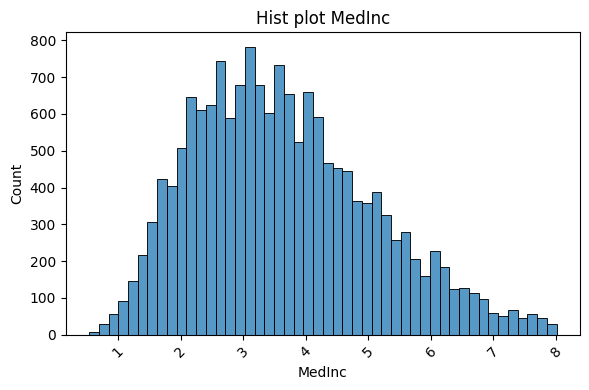

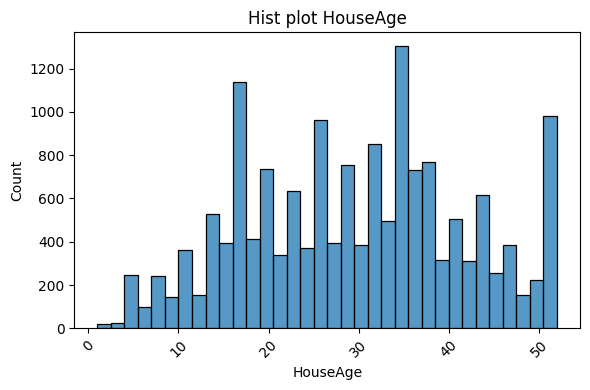

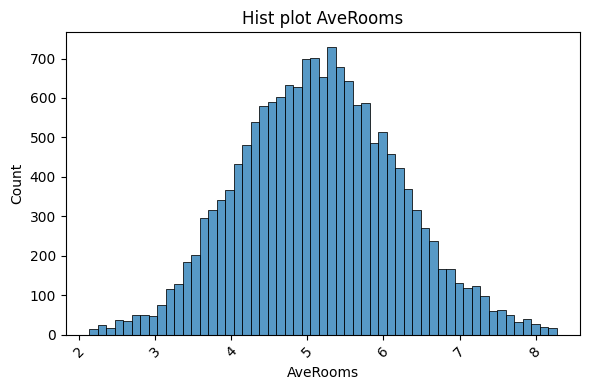

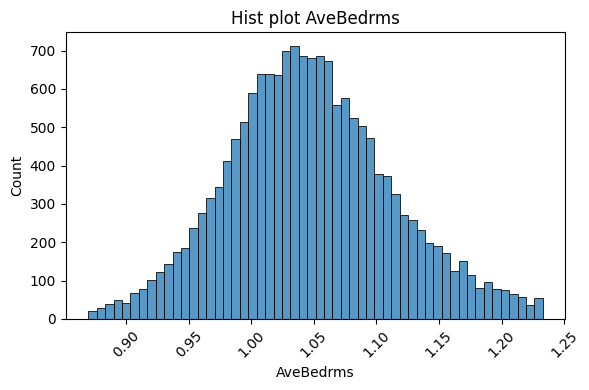

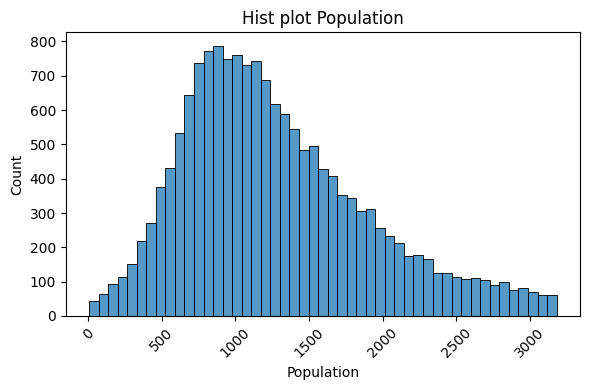

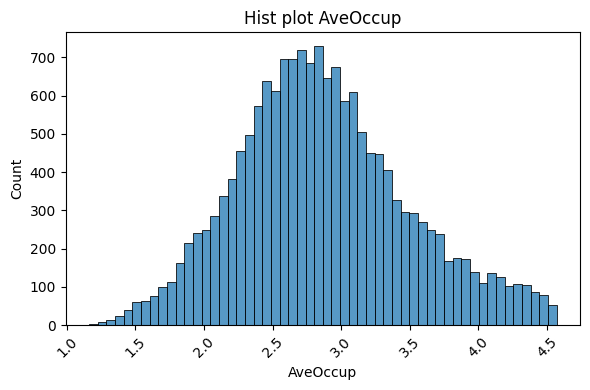

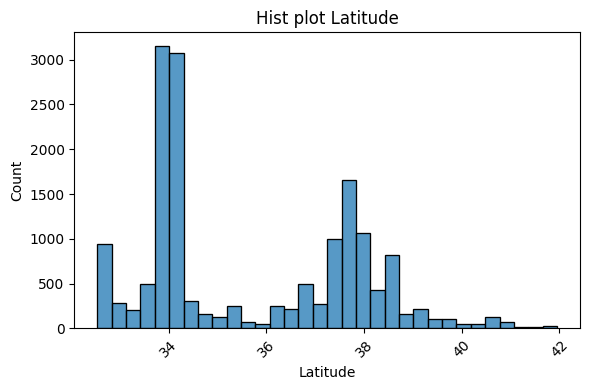

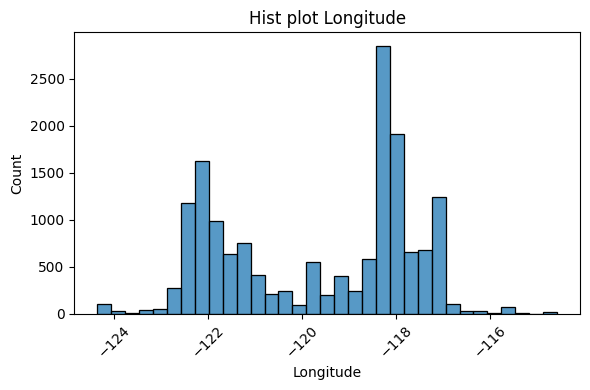

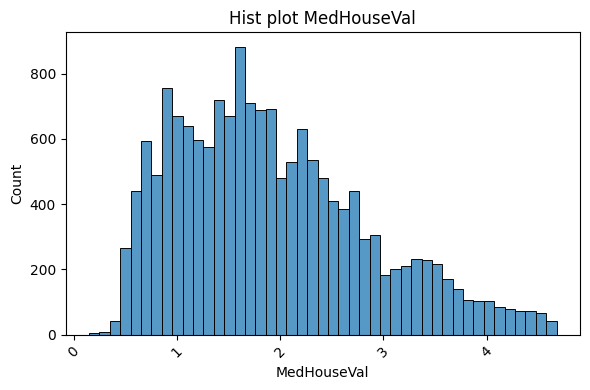

In [612]:
for col in cal_house.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(x=cal_house[col])
    plt.title(f'Hist plot {col}')
    plt.xticks(rotation=45)  
    plt.tight_layout()
    plt.show()

In [613]:
cal_house.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16232.000000,16232.000000,16232.000000,16232.000000,16232.000000,16232.000000,16232.000000,16232.000000,16232.000000
mean,3.648737,29.413011,5.150816,1.046886,1278.902292,2.868542,35.669639,-119.623566,1.916735
std,1.435056,12.187341,1.036654,0.065829,633.567975,0.626150,2.141406,1.995380,0.930086
min,0.536000,1.000000,2.133929,0.869822,5.000000,1.161290,32.540000,-124.350000,0.149990
25%,2.559200,19.000000,4.424242,1.002732,817.000000,2.440251,33.940000,-121.810000,1.183000
50%,3.487150,30.000000,5.138486,1.043478,1164.000000,2.817387,34.290000,-118.600000,1.768500
75%,4.569950,38.000000,5.843520,1.088379,1644.000000,3.248209,37.730000,-118.030000,2.480000
max,8.011300,52.000000,8.273632,1.232975,3183.000000,4.571046,41.950000,-114.570000,4.676000


In [614]:
#its not good to keep the ouliers as our data is getting skewed and its not a normal distribution so its better to remove outliers


In [615]:
cal_house.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16232.000000,16232.000000,16232.000000,16232.000000,16232.000000,16232.000000,16232.000000,16232.000000,16232.000000
mean,3.648737,29.413011,5.150816,1.046886,1278.902292,2.868542,35.669639,-119.623566,1.916735
std,1.435056,12.187341,1.036654,0.065829,633.567975,0.626150,2.141406,1.995380,0.930086
min,0.536000,1.000000,2.133929,0.869822,5.000000,1.161290,32.540000,-124.350000,0.149990
25%,2.559200,19.000000,4.424242,1.002732,817.000000,2.440251,33.940000,-121.810000,1.183000
50%,3.487150,30.000000,5.138486,1.043478,1164.000000,2.817387,34.290000,-118.600000,1.768500
75%,4.569950,38.000000,5.843520,1.088379,1644.000000,3.248209,37.730000,-118.030000,2.480000
max,8.011300,52.000000,8.273632,1.232975,3183.000000,4.571046,41.950000,-114.570000,4.676000


Scaling

In [616]:
x=cal_house.drop('MedHouseVal', axis=1)  
y= cal_house['MedHouseVal']  

x1=cal_house.drop('MedHouseVal', axis=1)  
y1= cal_house['MedHouseVal']  

In [617]:
minmax=MinMaxScaler()
x_cal_house=minmax.fit_transform(x)
cal_house=pd.DataFrame(x_cal_house)
cal_house.head()


,0,1,2,3,4,5,6,7
0,0.683197,1.0,0.599935,0.559646,0.174009,0.406673,0.564293,0.214724
1,0.442818,1.0,0.675590,0.581735,0.176211,0.299194,0.564293,0.214724
2,0.468316,1.0,0.427990,0.643819,0.128383,0.287002,0.564293,0.214724
3,0.417789,1.0,0.455719,0.224532,0.342668,0.283632,0.563231,0.214724
4,0.345672,1.0,0.433832,0.528707,0.362492,0.183873,0.563231,0.214724


- For this dataset,there is no missing values identified.but this dataset has lots of outliers.
- Removing outliers is a better option to avoid bias during model evaluation time
- Scaling is necessary because the range of values of each features must be in a unified way.either use minmaxscaler ,the values range from 0 to 1 or standardScaler is another oprtion whse values range from -1 to 1



2. Regression Algorithm Implementation (5 marks):
- Implement the following regression algorithms:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor
- Support Vector Regressor (SVR)
- For each algorithm: Provide a brief explanation of how it works. Explain why it
might be suitable for this dataset.

Linear Regression
- Linear regression is suitable for this dataset as its a continuous not discrete value to predict.
 

In [618]:
#Split the dataset as training and testing
xtrain,xtest,ytrain,ytest=train_test_split(cal_house,y,test_size=0.2,random_state=42)
print(xtrain)

              0         1         2         3         4         5         6  \
3474   0.183310  1.000000  0.239339  0.116642  0.308055  0.476939  0.164718   
13885  0.722901  0.176471  0.635616  0.492197  0.968534  0.657402  0.505845   
883    0.403623  0.686275  0.391064  0.358465  0.297357  0.408379  0.546227   
3707   0.408666  0.470588  0.324540  0.536790  0.445249  0.286608  0.162593   
543    0.544219  0.980392  0.737852  0.428533  0.288546  0.347464  0.551541   
...         ...       ...       ...       ...       ...       ...       ...   
13418  0.272016  0.509804  0.164477  0.235298  0.242920  0.387458  0.200850   
5390   0.410994  0.627451  0.539289  0.668252  0.361233  0.504790  0.164718   
860    0.739021  0.372549  0.665420  0.341037  0.370044  0.390137  0.545165   
15795  0.272484  0.294118  0.506104  0.743593  0.229075  0.411070  0.584485   
7270   0.183310  0.333333  0.574628  0.552385  0.065450  0.539250  0.480340   

              7  
3474   0.619632  
13885  0.261759

In [619]:
model=LinearRegression()
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)


Model evaluation

In [620]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(f'MAE={mean_absolute_error(y_pred,ytest)}')
print(f'MSE={mean_squared_error(y_pred,ytest)}')
print(f'r2_score={r2_score(y_pred,ytest)}')


MAE=0.42456784563319566
MSE=0.31467607126870084
r2_score=0.430078452830691


Using Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
xtrain, xtest, ytrain, ytest = train_test_split(x1, y1, test_size=0.2, random_state=42)
poly = PolynomialFeatures(degree=2, include_bias=False)

xtrain_poly = poly.fit_transform(xtrain)   
xtest_poly = poly.transform(xtest)           
model = LinearRegression()
model.fit(xtrain_poly, ytrain)
y_pred = model.predict(xtest_poly)
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)
print("MSE:", mse)
print("R²:", r2)

MSE: 0.27096526237742685
R²: 0.6763829663632035


Decision tree Regressor

In [624]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)

print(f'MAE={mean_absolute_error(y_pred,ytest)}')
print(f'MSE={mean_squared_error(y_pred,ytest)}')
print(f'r2_score={r2_score(y_pred,ytest)}')


MAE=0.42649091777024944
MSE=0.40146086109026796
r2_score=0.5409535776045773


Model comparion

- By comparing Linear regression , Polynomial regression and Decision Tree Regressor it has been observed that the features are more likley a curved distribution pattern .So polynomial regression out perform Linear regression and DecisionTree Regressor